In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [184]:
# 1- Índice de Sharpe Alphabet:

alphabet = 'GOOG'
ticker_alphabet = yf.Ticker(alphabet)
data_goog = ticker_alphabet.history(period='3y') 
investimento_inicial = 1000 
n_acoes1 = investimento_inicial / data_goog.iloc[0]['Close']
data_goog['Valor investido'] = n_acoes1 * data_goog['Close']
datap = pd.DataFrame()
datap['Valor investido'] = data_goog['Valor investido']
ret_goog = data_goog['Valor investido'].pct_change()
ret_total1 = (data_goog.iloc[-1]['Valor investido']/data_goog.iloc[0]['Valor investido'] - 1)
sigma_goog = ret_goog.std()
sharpe_inicial = ret_total1/sigma_goog
print(sharpe_inicial)

40.63248851707957


In [185]:
# 2- Coleta de Dados:

empresas = ['AAPL', 'ACN', 'ADBE', 'AMZN', 'AVGO', 'CRM', 'CSCO', 'GOOG', 'INTU', 'META', 'MSFT', 'ORCL', 'SAP', 'SHOP' ,'SNPS', 'TCEHY', 'TSLA', 'UBER', 'VMW', 'ZM']
dados_gerais = []

# Dados 1

for acao in empresas:
    dados = {}
    informacoes = yf.Ticker(acao).history(period='3y')

    dados['Nome'] = acao
    dados['Valor investido inicial'] = 1000

    dados['Quantidade Ações'] = 1000 / informacoes['Close'].iloc[0]
    dados['Valor investido atual'] = dados['Quantidade Ações'] * informacoes['Close'].iloc[-1]
    dados['Valor ganho dia'] = dados['Quantidade Ações'] * informacoes['Close']

# Dados 2

    dados['Retorno relativo total'] = (dados['Valor investido atual'] / dados['Valor investido inicial']) -1
    dados['Retorno relativo diario'] = (dados['Quantidade Ações'] * informacoes['Close']).pct_change()
    dados['Desvio padrão diario'] = dados['Retorno relativo diario'].std()
    dados['Indice Sharpee'] = dados['Retorno relativo total']/ dados['Desvio padrão diario']
    
    dados_gerais.append(dados)

In [186]:
# 3- Seleção do Portfólio por correlações:

portfolio = []
nova_adicao = 'GOOG'
df = pd.DataFrame()

for acao in dados_gerais:
    if acao['Nome'] == nova_adicao:
        portfolio.append(acao)

for acao in dados_gerais:
    df[acao['Nome']] = acao['Retorno relativo diario']
    
for acao in portfolio:
    nome = acao['Nome']
    df[f'Portifolio {nome}'] = acao['Retorno relativo diario']

correlacoes = df.corr()
menor_correlacao1 = 1000000000
nome_acao_menor_correlacao1 = ''

for i in range(len(correlacoes['Portifolio GOOG'])):
    if correlacoes['Portifolio GOOG'].iloc[i] < menor_correlacao1:
        menor_correlacao1 = correlacoes['Portifolio GOOG'].iloc[i]
        nome_acao_menor_correlacao1 = correlacoes['Portifolio GOOG'].index[i]

print(menor_correlacao1)
print(nome_acao_menor_correlacao1)

0.27134304989826297
TCEHY


In [187]:
nova_adicao1 = nome_acao_menor_correlacao1

for acao in dados_gerais:
    if acao['Nome'] == nova_adicao1:
        portfolio.append(acao)

menor_correlacao2 = 1000000000
nome_acao_menor_correlacao2 = ''

for i in range(len(correlacoes['Portifolio GOOG'])):

    if correlacoes['Portifolio GOOG'].iloc[i] < menor_correlacao2:
        if correlacoes['Portifolio GOOG'].index[i] != nova_adicao1 and correlacoes['Portifolio GOOG'].index[i] != 'Portifolio GOOG':
            menor_correlacao2 = correlacoes['Portifolio GOOG'].iloc[i]
            nome_acao_menor_correlacao2 = correlacoes['Portifolio GOOG'].index[i]

for i in range(len(correlacoes[nova_adicao1])):    

    if correlacoes[nova_adicao1].iloc[i] < menor_correlacao2:
        if correlacoes[nova_adicao1].index[i] != nova_adicao1 and correlacoes[nova_adicao1].index[i] != 'Portifolio GOOG':
            menor_correlacao2 = correlacoes[nova_adicao1].iloc[i]
            nome_acao_menor_correlacao2 = correlacoes[nova_adicao1].index[i]

print(menor_correlacao2)
print(nome_acao_menor_correlacao2)

0.10694580778836088
ORCL


In [188]:
nova_adicao2 = nome_acao_menor_correlacao2

for acao in dados_gerais:
    if acao['Nome'] == nova_adicao2:
        portfolio.append(acao)

menor_correlacao3 = 1000000000
nome_acao_menor_correlacao3 = ''

for i in range(len(correlacoes['Portifolio GOOG'])):

    if correlacoes['Portifolio GOOG'].iloc[i] < menor_correlacao3:
        if correlacoes['Portifolio GOOG'].index[i] != 'Portifolio GOOG' and correlacoes['Portifolio GOOG'].index[i] != nova_adicao1 and correlacoes['Portifolio GOOG'].index[i] != nova_adicao2:
            menor_correlacao3 = correlacoes['Portifolio GOOG'].iloc[i]
            nome_acao_menor_correlacao3 = correlacoes['Portifolio GOOG'].index[i]

for i in range(len(correlacoes[nova_adicao])):    

    if correlacoes[nova_adicao1].iloc[i] < menor_correlacao3:
        if correlacoes[nova_adicao1].index[i] != 'Portifolio GOOG' and correlacoes[nova_adicao1].index[i] != nova_adicao1 and correlacoes[nova_adicao1].index[i] != nova_adicao2:
            menor_correlacao3 = correlacoes[nova_adicao1].iloc[i]
            nome_acao_menor_correlacao3 = correlacoes[nova_adicao1].index[i]

for i in range(len(correlacoes[nova_adicao])):    

    if correlacoes[nova_adicao2].iloc[i] < menor_correlacao3:
        if correlacoes[nova_adicao2].index[i] != 'Portifolio GOOG' and correlacoes[nova_adicao2].index[i] != nova_adicao1 and correlacoes[nova_adicao2].index[i] != nova_adicao2:
            menor_correlacao3 = correlacoes[nova_adicao2].iloc[i]
            nome_acao_menor_correlacao3 = correlacoes[nova_adicao2].index[i]

nova_adicao3 = nome_acao_menor_correlacao3

for acao in dados_gerais:
    if acao['Nome'] == nova_adicao3:
        portfolio.append(acao)

print(menor_correlacao3)
print(nome_acao_menor_correlacao3)

0.11624985119049988
CSCO


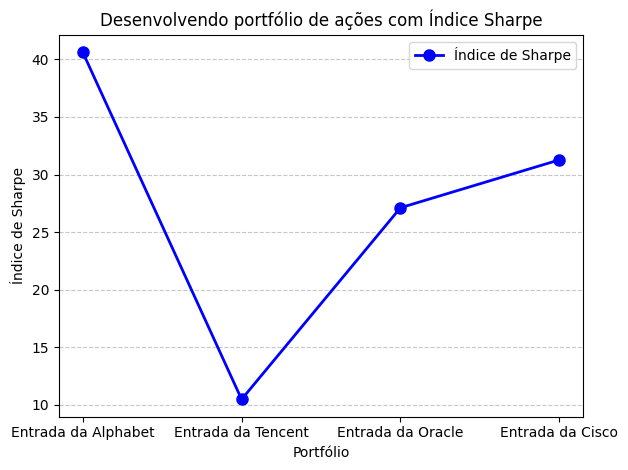

In [189]:
# 4- Cálculo dos Índices para cada Portfólio:

sharpees = []

datap = pd.DataFrame()
datap1 = pd.DataFrame()
datap2 = pd.DataFrame()
datap3 = pd.DataFrame()

datap['Valor investido'] = portfolio[0]['Valor ganho dia'] 
datap1['Valor investido'] = datap['Valor investido'] + portfolio[1]['Valor ganho dia']
datap2['Valor investido'] = datap1['Valor investido'] + portfolio[2]['Valor ganho dia']
datap3['Valor investido'] = datap2['Valor investido'] + portfolio[3]['Valor ganho dia']

retornop = datap['Valor investido'].pct_change()
retornop1 = datap1['Valor investido'].pct_change()
retornop2 = datap2['Valor investido'].pct_change()
retornop3 = datap3['Valor investido'].pct_change()

retorno_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)
retorno_totalp1 = (datap1.iloc[-1]['Valor investido']/datap1.iloc[0]['Valor investido'] - 1)
retorno_totalp2 = (datap2.iloc[-1]['Valor investido']/datap2.iloc[0]['Valor investido'] - 1)
retorno_totalp3 = (datap3.iloc[-1]['Valor investido']/datap3.iloc[0]['Valor investido'] - 1)

desvio_padrao = retornop.std()
desvio_padrao1 = retornop1.std()
desvio_padrao2 = retornop2.std()
desvio_padrao3 = retornop3.std()

sharpee0 = retorno_totalp/desvio_padrao
sharpee1 = retorno_totalp1/desvio_padrao1
sharpee2 = retorno_totalp2/desvio_padrao2
sharpee3 = retorno_totalp3/desvio_padrao3

sharpees.append(sharpe_inicial)
sharpees.append(sharpee1)
sharpees.append(sharpee2)
sharpees.append(sharpee3)

portfolios = ['Entrada da Alphabet', 'Entrada da Tencent', 'Entrada da Oracle', 'Entrada da Cisco']

# 5- Gráfico de Índice de Sharpe: 

plt.figure()
plt.plot(portfolios, sharpees, marker='o', color='blue', markersize=8, linewidth=2)
plt.xlabel('Portfólio')
plt.ylabel('Índice de Sharpe')
plt.title('Desenvolvendo portfólio de ações com Índice Sharpe')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Índice de Sharpe'], loc='best', fontsize=10)
plt.tight_layout()
plt.show()